In [1]:
import h5py
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

import warnings
warnings.filterwarnings('ignore', '.*FutureWarning*.')
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

In [2]:
output_path = '../../data/dedalus/basic_state'

In [17]:
f = h5py.File(output_path+"/output.h5", 'r')

data = f['tasks']
t = data['b'].dims[0]['sim_time'][:]#/86400.
z = data['b'].dims[1]['z/1.0'][:]
z = data['bz'].dims[1]['z/1.0'][:]

b = data['b'][:,:].swapaxes(0,1)
u = data['u'][:,:].swapaxes(0,1)
v = data['v'][:,:].swapaxes(0,1)

bz = data['bz'][:,:].swapaxes(0,1)
uz = data['uz'][:,:].swapaxes(0,1)
vz = data['vz'][:,:].swapaxes(0,1)

(0, 540000)

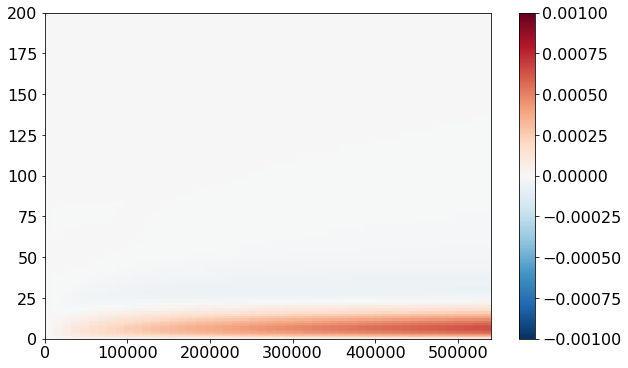

In [22]:
plt.pcolormesh(t, z, u, cmap=div_cmap)
plt.colorbar()
plt.ylim([0.,200.])
plt.clim([-1.e-3,1.e-3])
plt.xlim([0,180*60*50])

In [16]:
data_dir = "../../MITgcm/experiments/rotated_control/run/"

ds = open_mdsdataset(data_dir,iters=[5,10],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])

ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

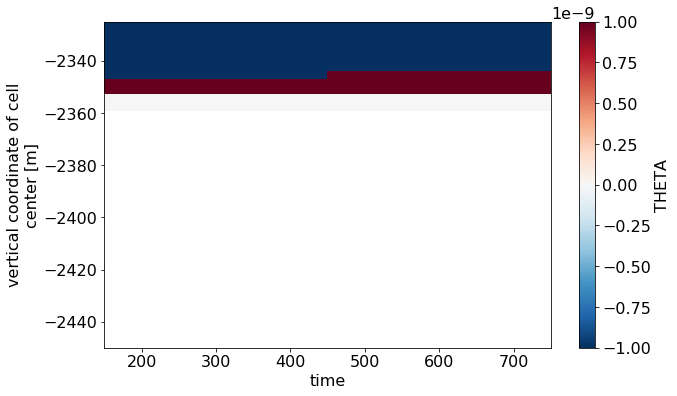

In [17]:
#q = ds['gT_Forc'].isel(YC=0, time=0).plot(y='Z', cmap='RdBu_r')
q = ds['THETA'].mean(dim=['XC','YC']).plot(y='Z')
plt.ylim([-2450, -2325])
q.set_clim([-1.e-9,1.e-9])


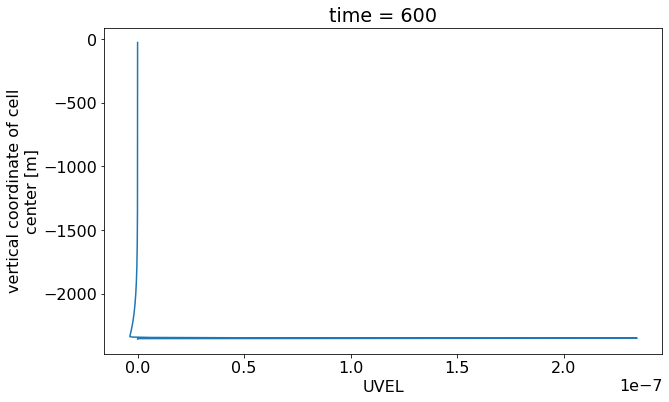

In [13]:
q = ds['UVEL'].mean(dim=['XG','YC']).plot(y='Z')

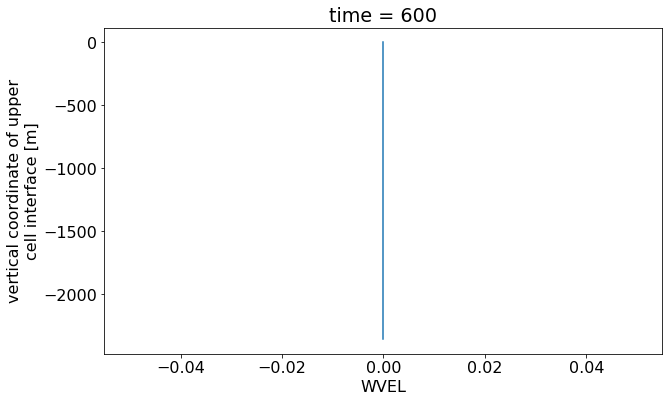

In [14]:
q = ds['WVEL'].mean(dim=['XC','YC']).plot(y='Zl')

In [15]:
T = 2. * np.pi* (0.53e-4)**-1
T

118550.66617319973